In [1]:
#Notebook to explore Soft K-Means and Gaussian Mixture Models
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal

%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Generate fake clusters
data = np.zeros((1000,2))
data[:500] = np.random.normal(size = (500,2))
data[500:800] = np.random.normal((4,4), 2, (300,2))
data[800:] = np.random.normal((4,-2), .5, (200,2))
y = np.concatenate((np.ones(500), np.ones(300) * 2, np.ones(200) * 3))

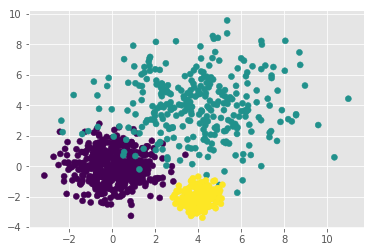

In [3]:
plt.scatter(data[:,0], data[:,1], c = y)

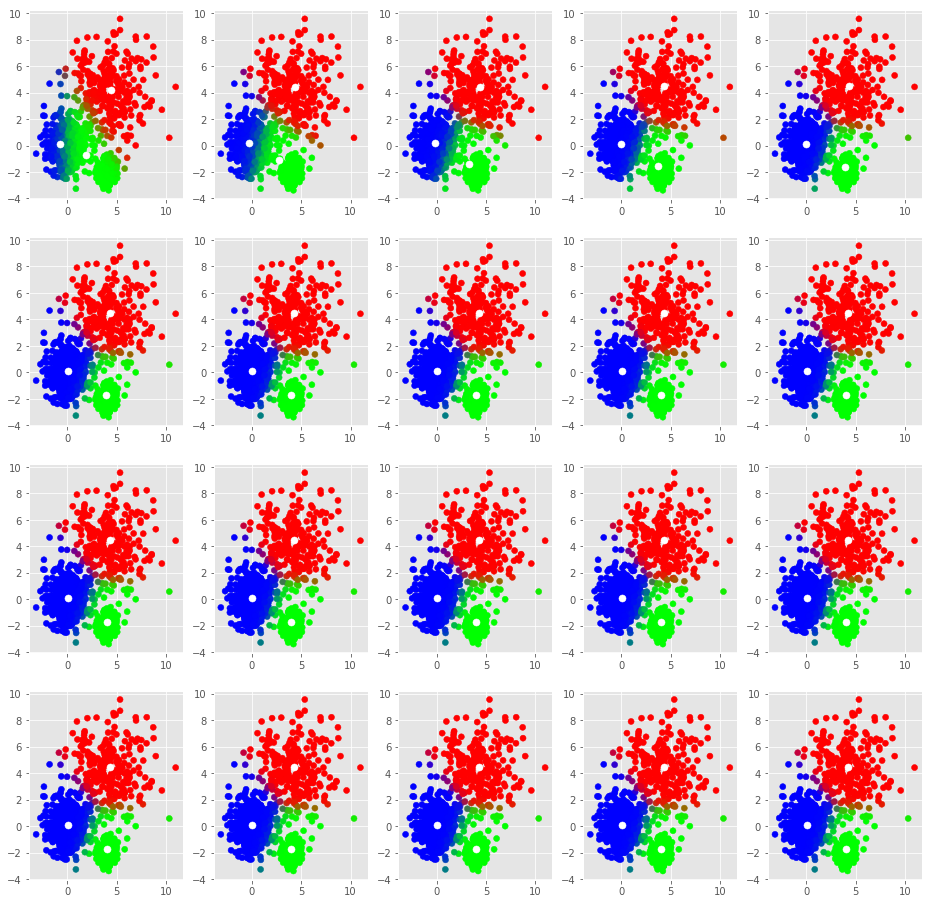

In [4]:
#Soft K-Means
#Hyper-parameters
K = 3
beta = .4
max_reps = 20

N, _ = data.shape
R = np.zeros((N,K))
otheR = np.zeros((N,K))
#Color array
colors = np.eye(3)

#Choose the initial cluster centers
M = data[np.random.randint(0, N, K)]

fig, axs = plt.subplots((max_reps - 1) // 5 + 1, 5, figsize = (16, 16))

#Note that the norm of a vector is not the same thing as its length
def d(a, b):
    diff = a - b
    return np.apply_along_axis(lambda x: x.dot(x), axis = 1, arr = diff)

for ax in axs.flatten():
    #Calculate the responsibilities
    for k in range(K):
#         for n in range(N):
#              otheR[n,k] = np.exp(-beta*d(M[k], data[n])) / np.sum( np.exp(-beta*d(M[j], data[n])) for j in range(K))
        numerator = np.exp(-beta * d(M[k,:], data))
        denominator = np.sum(np.exp(-beta * d(M[j,:], data)) for j in range(K))        
        R[:,k] = numerator / denominator
        
    for k in range(K):
        M[k] = R[:,k].dot(data) / R[:,k].sum()
    
    colordot = np.dot(R, colors)
    ax.scatter(data[:,0], data[:,1], c = colordot)
    ax.scatter(M[:,0], M[:,1], color = "white", s = 50)
    

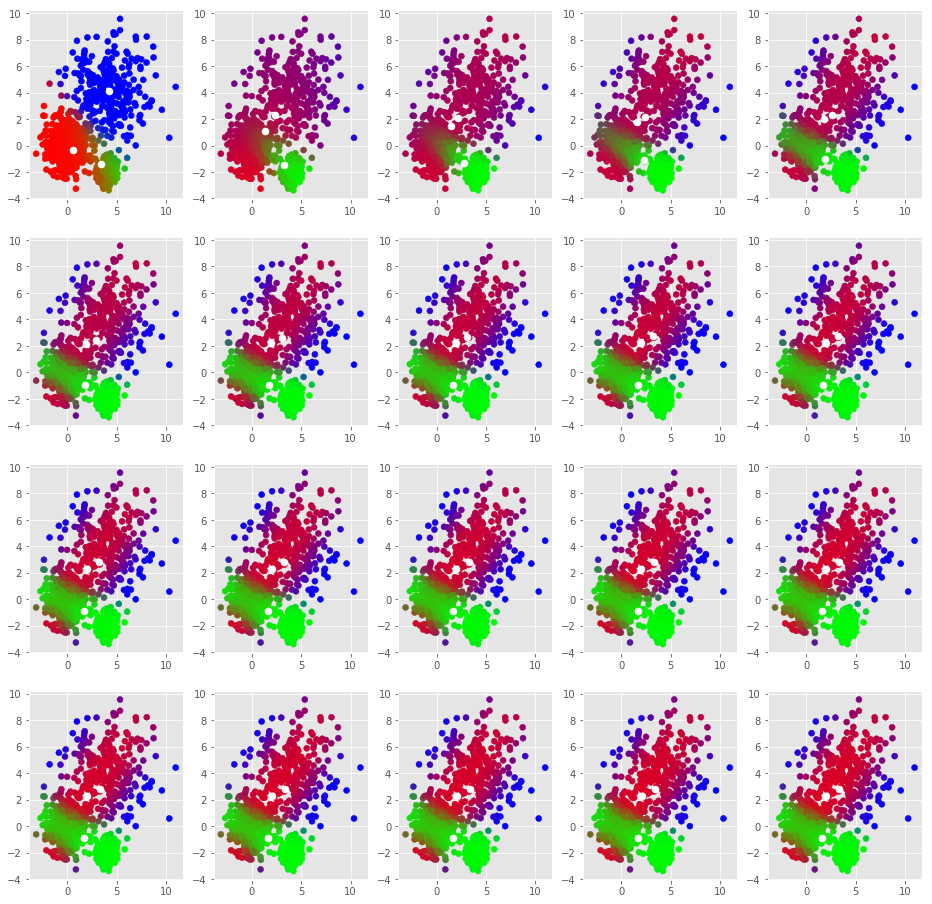

In [5]:
#Gaussian Mixture Models
#Hyper-parameters
K = 3
max_reps = 20

N, D = data.shape

phi = np.zeros((N,K))
pi = np.ones(K) / K
mu = data[np.random.randint(0, N, K)]
covar = [np.ones(D) for _ in range(K)]

fig, axs = plt.subplots((max_reps - 1) // 5 + 1, 5, figsize = (16, 16))

for ax in axs.flatten():
    mv_dists = [multivariate_normal(mu[k], covar[k]) for k in range(K)]
    for k in range(K):
        for n in range(N):
            phi[n,k] = pi[k] * mv_dists[k].pdf(data[n])
            phi[n,k] /= np.sum(pi[j] * mv_dists[j].pdf(data[n]) for j in range(K))
    
    for k in range(K):
        mu[k] = phi[:,k].dot(data) / phi[:,k].sum()
        #covar[k] = np.sum(phi[:,k].dot(data - mu[k]).dot((data - mu[k]).T)) / phi[:,k].sum()
        covar[k] = np.sum(phi[n,k]*np.outer(data[n] - M[k], data[n] - M[k]) for n in range(N)) / phi[:,k].sum() + np.eye(D)*1e-4
        pi[k] = phi[:,k].sum() / N
    
    colordot = np.dot(phi, colors)
    ax.scatter(data[:,0], data[:,1], c = colordot)
    ax.scatter(mu[:,0], mu[:,1], color = "white", s = 50)

In [6]:
mu

array([[ 2.05553136,  2.30490727],
       [ 1.64771595, -0.90984822],
       [ 3.37443951,  2.83609613]])